<a href=\"https://colab.research.google.com/github/CalCraven/plotting_in_python/blob/main/plot-IR-Data.ipynb\" target=\"_parent\"><img src=\"https://colab.research.google.com/assets/colab-badge.svg\" alt=\"Open In Colab\"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_miniforge()

In [ ]:
import condacolab
condacolab.check()

!conda install mamba -y
!mamba install anaconda-client -n base -y

!git clone https://github.com/CalCraven/plotting_in_python.git
%cd plotting_in_python

!pip install .
%cd ..
!pip install --upgrade ipykernel -y

!mamba install -c conda-forge pandas plotly matplotlib numpy openpyxl -y

In [1]:
# Load data

import pandas as pd

df = pd.read_excel('data/9-9-24 pDCPD-b-pNBDAC Modified.xlsx')
df

,Unnamed: 0,Regular,Unnamed: 2,Unnamed: 3,Unnamed: 4,Normalized,Unnamed: 6,Unnamed: 7,Unnamed: 8,Scaled 1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Scaled 2,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,399.9158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
1,400.1569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
2,400.3979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
3,400.6390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
4,400.8800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931,3999.1580,-0.002477,-0.002126,-0.002262,-0.004668,-0.002477,-0.001003,-0.001111,-0.002222,-0.002477,0.048997,0.118889,0.167778,0.007523,0.078997,0.198889,0.297778
14932,3999.3990,-0.002475,-0.002129,-0.002264,-0.004674,-0.002475,-0.001005,-0.001112,-0.002225,-0.002475,0.048995,0.118888,0.167775,0.007525,0.078995,0.198888,0.297775
14933,3999.6400,-0.002479,-0.002135,-0.002270,-0.004688,-0.002479,-0.001008,-0.001115,-0.002231,-0.002479,0.048992,0.118885,0.167769,0.007521,0.078992,0.198885,0.297769
14934,3999.8810,-0.002488,-0.002145,-0.002279,-0.004709,-0.002488,-0.001012,-0.001119,-0.002241,-0.002488,0.048988,0.118881,0.167759,0.007512,0.078988,0.198881,0.297759


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/python_tutorials')

In [2]:
# rename and slice columns of data
df = df.rename(columns={
    "Unnamed: 0": "xaxis",
    "Regular": "Sample1",
    "Unnamed: 2": "Sample2",
    "Unnamed: 3": "Sample3",
    "Unnamed: 4": "Sample4"
})
df = df.loc[:, :"Sample4"]
df

,xaxis,Sample1,Sample2,Sample3,Sample4
0,399.9158,0.000000,0.000000,0.000000,0.000000
1,400.1569,0.000000,0.000000,0.000000,0.000000
2,400.3979,0.000000,0.000000,0.000000,0.000000
3,400.6390,0.000000,0.000000,0.000000,0.000000
4,400.8800,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
14931,3999.1580,-0.002477,-0.002126,-0.002262,-0.004668
14932,3999.3990,-0.002475,-0.002129,-0.002264,-0.004674
14933,3999.6400,-0.002479,-0.002135,-0.002270,-0.004688
14934,3999.8810,-0.002488,-0.002145,-0.002279,-0.004709


In [4]:
# normalize and offset data
cols_to_norm = ["Sample1", "Sample2", "Sample3", "Sample4"]
# normalize data by using lambda function
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
for i, col in enumerate(cols_to_norm): # iterate through each column and add i to offset data points
    df[col] = df[col].apply(lambda x: (x + i))

<Axes: xlabel='xaxis'>

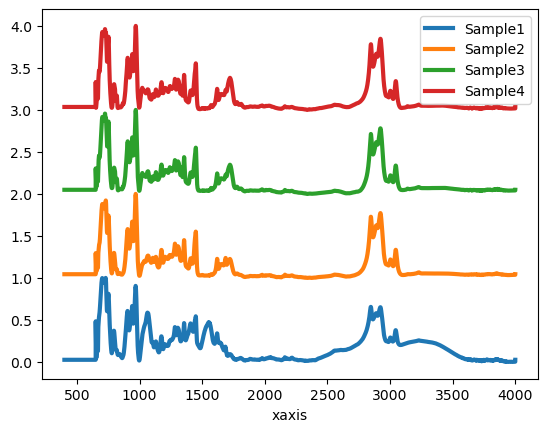

In [5]:
# plot IR
df.plot(x="xaxis", y=cols_to_norm, kind="line", lw=3)

In [ ]:
# plot into two section plots

In [ ]:
# plot IR with labels

In [ ]:
# use a function to identify peaks
import scipy

peak_info = scipy.signal.find_peaks(
    df["Sample1"],
    height=0.5, distance=1000,
    width=10
)
print(f"Number of peaks found is {len(peak_info[0])}\n")
peak_info[1].keys()

Number of peaks found is 4



dict_keys(['peak_heights', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])

In [ ]:
peak_info

(array([ 1254,  1367,  1458,  2091,  2244,  2359,  2752,  4351, 10149,
        10325, 10467]),
 {'peak_heights': array([0.99836737, 1.        , 0.81089083, 0.6066944 , 0.66567258,
         0.90499633, 0.58657613, 0.54314521, 0.65524086, 0.57963856,
         0.65103561]),
  'prominences': array([0.0580685 , 0.97464566, 0.2078797 , 0.23113786, 0.21006552,
         0.85981521, 0.57013612, 0.42960259, 0.64360496, 0.03054553,
         0.14470011]),
  'left_bases': array([ 1036,  1036,  1413,  1912,  1912,  1912,  2478,  3127,  8040,
         10219, 10219]),
  'right_bases': array([ 1306, 14694,  1912,  2144,  2281, 14694,  8040,  8040, 14694,
         10376, 14694]),
  'widths': array([ 42.96385285, 351.76455244,  42.46858517,  55.97819981,
          34.04863051, 110.79106543, 288.1915994 , 281.63945017,
         618.03525618,  58.11031605,  97.13968512]),
  'width_heights': array([0.96933312, 0.51267717, 0.70695098, 0.49112547, 0.56063982,
         0.47508872, 0.30150807, 0.32834392, 0.333

In [ ]:
# use a function to get the peak area

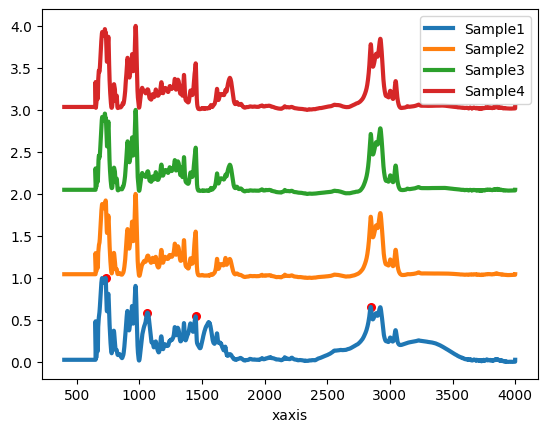

In [ ]:
# Automatically mark peaks and highlight chosen IR regions
import matplotlib.pyplot as plt

IR_RegionsDict = {

}
# fig, ax = plt.subplots()
ax = df.plot(x="xaxis", y=cols_to_norm, kind="line", lw=3)

xdata = df["xaxis"]
for center, height in zip(peak_info[0], peak_info[1]["peak_heights"]):
  xcenter = xdata[center]
  # ax.axvspan(xcenter, x, color='red', alpha=0.5)
  ax.scatter(xcenter, height, c="r", s=30)
fig.show()


In [ ]:
# Prettify with images of molecules

In [ ]:
# plot onto dataframe

In [ ]:
# other cool pandas dataset to plot